<a href="https://colab.research.google.com/github/James606240/NTUT_Test/blob/main/GT_CH2_house_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import requests

from tensorflow import keras
from tensorflow.keras import layers

url = 'https://raw.githubusercontent.com/James606240/NTUT_Test/main/kc_house_data.csv'
#Not OK：https://github.com/James606240/NTUT_Test/blob/main/kc_house_data.csv
data = pd.read_csv(url)
data.shape
pd.options.display.max_columns = 21
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
data.dtypes
data['year'] = pd.to_numeric(data['date'].str.slice(0, 4))
data['month'] = pd.to_numeric(data['date'].str.slice(4, 6))
data['day'] = pd.to_numeric(data['date'].str.slice(6, 8))
pd.options.display.max_columns = 24
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5,12
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015,4,15
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015,3,12


In [ ]:
data.drop(['id'], axis="columns", inplace=True)
data.drop(['date'], axis="columns", inplace=True)
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5,12
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015,4,15
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015,3,12


In [ ]:
data_num = data.shape[0]
indexes = np.random.permutation(data_num)
train_indexes = indexes[:int(data_num *0.6)]
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num *0.8):]
train_data = data.loc[train_indexes]
val_data = data.loc[val_indexes]
test_data = data.loc[test_indexes]

In [ ]:
train_data.shape

(12967, 22)

In [ ]:
val_data.shape

(4323, 22)

In [ ]:
test_data.shape

(4323, 22)

In [ ]:
train_validation_data = pd.concat([train_data, val_data])
#train_data及val_data資料合併
mean = train_validation_data.mean()
std = train_validation_data.std()

train_data = (train_data - mean) / std
val_data = (val_data - mean) / std
train_data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
18188,1.239297,-0.399363,0.496339,-0.042171,-0.241900,0.933541,-0.088375,-0.303952,0.905781,1.149373,0.303815,-0.660190,0.847361,-0.210844,-0.844013,0.857521,0.032557,0.666005,-0.260269,1.444586,-1.787661,0.497391
15143,-0.688636,1.735430,-0.801559,-0.263870,-0.178651,0.007020,-0.088375,-0.303952,0.905781,-0.561354,0.058727,-0.660190,-0.307980,-0.210844,2.241090,-1.404537,-0.698675,-0.434166,-0.169064,1.444586,-0.503132,-0.890789
3699,0.248366,0.668033,-0.152610,-0.339943,-0.257712,0.933541,-0.088375,-0.303952,0.905781,-0.561354,-0.025371,-0.660190,-2.210894,-0.210844,0.539609,0.826375,-1.224026,-0.639531,-0.282164,1.444586,-1.145396,-1.353516
8952,-0.049587,0.668033,0.171865,-0.307340,-0.163798,-0.919501,-0.088375,-0.303952,0.905781,0.294010,-0.517950,0.335685,0.303671,-0.210844,-0.844013,0.950959,0.210040,0.563322,-0.152122,-0.692200,-0.503132,-0.428062
11454,0.834835,0.668033,1.794238,0.605536,-0.234383,0.933541,-0.088375,2.314550,-0.629908,0.294010,1.019857,-0.660190,-1.157495,4.747455,1.081839,-0.134800,-1.202728,-0.419497,-0.249860,-0.692200,-0.503132,0.381709
17782,-0.826153,-1.466759,-1.450509,-1.241952,-0.247991,-0.919501,-0.088375,-0.303952,0.905781,-2.272082,-1.022543,-0.660190,-0.647786,-0.210844,2.241090,-1.014852,-0.783867,-1.152944,-0.192431,-0.692200,-0.182000,-1.469198
1702,-0.864172,0.668033,-0.801559,-1.046335,-0.246643,-0.919501,-0.088375,-0.303952,-0.629908,-1.416718,-0.806289,-0.660190,-0.070115,4.787161,-0.675735,-1.433510,0.898676,-1.226288,-0.271252,-0.692200,-0.503132,-1.237834
1811,-0.648190,1.735430,-1.450509,-0.155194,-0.157266,-0.919501,-0.088375,-0.303952,-0.629908,-0.561354,0.178869,-0.660190,-0.477883,-0.210844,2.054114,-0.869263,-0.436000,-0.888903,-0.143077,-0.692200,0.139133,0.613073
3147,-0.526852,-0.399363,-0.152610,-0.709440,-0.278449,-0.919501,-0.088375,-0.303952,0.905781,-0.561354,-1.154698,0.697821,-2.142933,-0.210844,2.259788,0.619219,-1.209827,-0.654200,-0.282164,1.444586,-1.466528,0.960118
19329,-0.804582,0.668033,0.496339,-0.361678,-0.091814,0.933541,-0.088375,-0.303952,0.905781,-0.561354,-0.049400,-0.660190,0.133768,-0.210844,-1.030989,-1.780461,-1.224026,-0.140787,-0.137729,-0.692200,1.744793,-0.081017


In [ ]:
train_validation_data.shape

(17290, 22)

In [ ]:
train_data.shape

(12967, 22)

In [ ]:
val_data.shape

(4323, 22)

In [ ]:
arr = [[10, 20, 25],[25, 40, 50]]
print("算術平均數",np.mean(arr))

算術平均數 28.333333333333332


In [ ]:
arr = [[10, 20, 25],[25, 40, 50]]
print("標準差",np.std(arr))

標準差 13.123346456686352


In [ ]:
#@title 預設標題文字
x_train = np.array(train_data.drop('price', axis='columns'))
#drop丟棄此欄位
y_train = np.array(train_data['price'])
x_val = np.array(val_data.drop('price', axis='columns'))
y_val = np.array(val_data['price'])
#axis=1等价于axis='columns'
#axis=1row-wise
print(y_train)

[ 1.23929685 -0.68863621  0.24836622 ... -0.7964926  -0.37854907
  0.49778413]


In [ ]:
print(x_train)

[[-0.39936302  0.49633928 -0.0421714  ...  1.44458577 -1.7876606
   0.4973912 ]
 [ 1.73542955 -0.80155941 -0.2638699  ...  1.44458577 -0.50313185
  -0.89078929]
 [ 0.66803327 -0.15261006 -0.33994291 ...  1.44458577 -1.14539623
  -1.35351612]
 ...
 [-0.39936302 -0.15261006 -0.66597011 ... -0.69219992  0.13913252
  -0.08101734]
 [ 0.66803327 -0.47708474  0.63813869 ... -0.69219992 -0.18199967
   0.4973912 ]
 [ 1.73542955  2.11871263  1.38800125 ... -0.69219992  1.10252907
  -0.65942588]]


In [ ]:
y_train.shape

(12967,)

In [ ]:
model = keras.Sequential(name='model-1')
# 第1層全連接層設為64個unit，將輸入形狀設定為(21, )，而實際上我們輸入的數據形狀為(batch_size, 21)
model.add(layers.Dense(64, activation='relu', input_shape=(21,), name="layer1"))
# 第2層全連接層設為64個unit
model.add(layers.Dense(64, activation='relu', name="layer2"))
# 最後一層全連接層設為1個unit
model.add(layers.Dense(1, name="layer3"))
# 顯示網路模型架構
model.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                1408      
_________________________________________________________________
layer2 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

In [ ]:
model_dir = 'lab3-logs/models/'
os.makedirs(model_dir)

In [ ]:
# TensorBoard回調函數會幫忙紀錄訓練資訊，並存成TensorBoard的紀錄檔
log_dir = os.path.join('lab3-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# ModelCheckpoint回調函數幫忙儲存網路模型，可以設定只儲存最好的模型，「monitor」表示被監測的數據，「mode」min則代表監測數據越小越好。
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                        monitor='val_mean_absolute_error', 
                                        save_best_only=True, 
                                        mode='min')

In [ ]:
history = model.fit(x_train, y_train,  # 傳入訓練數據
               batch_size=64,  # 批次大小設為64
               epochs=50,  # 整個dataset訓練300遍
               validation_data=(x_val, y_val),  # 驗證數據
               callbacks=[model_cbk, model_mckp])  # Tensorboard回調函數紀錄訓練過程，ModelCheckpoint回調函數儲存最好的模型

Epoch 1/50
203/203 [==============================] - 2s 5ms/step - loss: 0.6566 - mean_absolute_error: 0.4613 - val_loss: 0.2566 - val_mean_absolute_error: 0.2923
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.2023 - mean_absolute_error: 0.2799 - val_loss: 0.2347 - val_mean_absolute_error: 0.2937
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.1933 - mean_absolute_error: 0.2707 - val_loss: 0.1834 - val_mean_absolute_error: 0.2530
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.1716 - mean_absolute_error: 0.2497 - val_loss: 0.1720 - val_mean_absolute_error: 0.2432
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.1356 - mean_absolute_error: 0.2317 - val_loss: 0.1552 - val_mean_absolute_error: 0.2330
Epoch 6/50
203/203 [==============================] - 0s 2ms/step - loss: 0.1456 - mean_absolute_error: 0.2325 - val_loss: 0.1502 - val_mean_absolute_error: 0.2313
Epoch 7/50
203/2

In [ ]:
history.history.keys()  # 查看history儲存的資訊有哪些

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

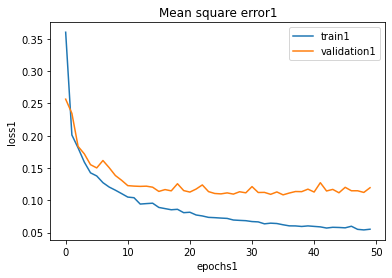

In [ ]:
plt.plot(history.history['loss'], label='train1')
plt.plot(history.history['val_loss'], label='validation1')
plt.title('Mean square error1')
plt.ylabel('loss1')
plt.xlabel('epochs1')
plt.legend(loc='best')
#原為plt.legend(loc='upper right')

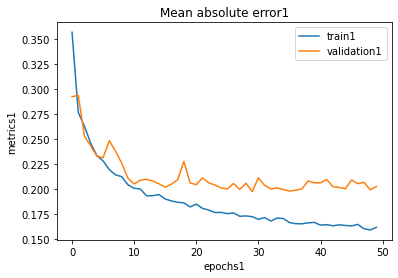

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='train1')
plt.plot(history.history['val_mean_absolute_error'], label='validation1')
plt.title('Mean absolute error1')
plt.ylabel('metrics1')
plt.xlabel('epochs1')
plt.legend(loc='best')
#原為plt.legend(loc='upper right')

In [ ]:
# 載入模型
model = keras.models.load_model('lab3-logs/models/Best-model-1.h5')
# 先將房屋價格取出
y_test = np.array(test_data['price'])
# 標準化數據
test_data = (test_data - mean) / std
# 將輸入數據存成Numpy 格式
x_test = np.array(test_data.drop('price', axis='columns'))
# 預測測試數據
y_pred = model.predict(x_test)
# 將預測結果轉換回來(因為訓練時的訓練目標也有經過標準化)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
# 計算平均的誤差百分比
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
# 顯示誤差百分比
print("Model Percentage Error: {:.2f}%".format(percentage_error))

Model Percentage Error: -57175772333818.09%
